In [66]:
import pcvae
import utils

import numpy as np
import torch

In [42]:
dataset_train = pcvae.PointCloudDataSet('../data/Humanoid-v3-locomotions_static.npz')
dataset_test = pcvae.PointCloudDataSet('../data/Humanoid-v3-locomotions_static.npz', train='test')

In [43]:
model = pcvae.PointCloudVariationalAutoEncoder(n_points=1024, latent_size=16)

In [44]:
model.load_model('models/pcvae_epoch_2999.pth')

In [54]:
samples = model.sample(n_sample=9)
samples = samples.numpy()
print(samples.shape)

(9, 3, 1024)


<IPython.core.display.Javascript object>


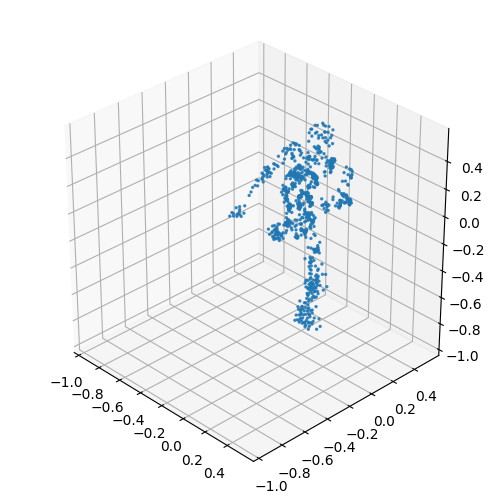

<IPython.core.display.Javascript object>


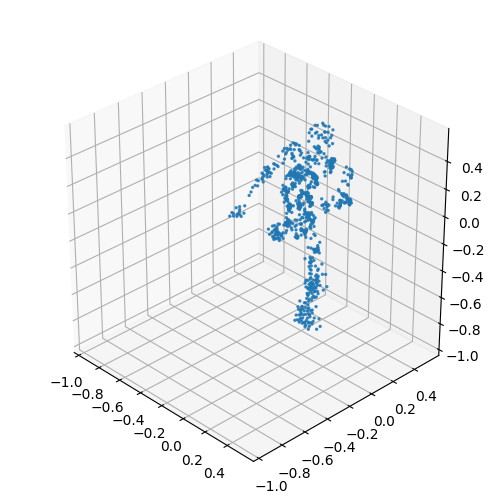

In [56]:
%matplotlib notebook
idx = 3
#samples = dataset_train.pc_data
utils.plot_3d_point_cloud(samples[idx, 0, :], samples[idx, 1, :], samples[idx, 2, :])

In [75]:
z0 = np.random.randn(16)
z1 = np.random.randn(16)

n_interp = 5
length = np.linalg.norm(z1-z0)

interp_z = np.array([ z0+(i+1)/float(n_interp)*length*(z1-z0)for i in range(n_interp)])
#print(interp_z)

samples_z0_z1 = model.sample(z=torch.from_numpy(np.array([z0, z1])).float()).numpy()
samples_interp = model.sample(z=torch.from_numpy(interp_z).float()).numpy()

samples_interp = np.concatenate([samples_z0_z1[0][np.newaxis, :], samples_interp, samples_z0_z1[1][np.newaxis, :]])
print(samples_interp.shape)

(7, 3, 1024)


<IPython.core.display.Javascript object>


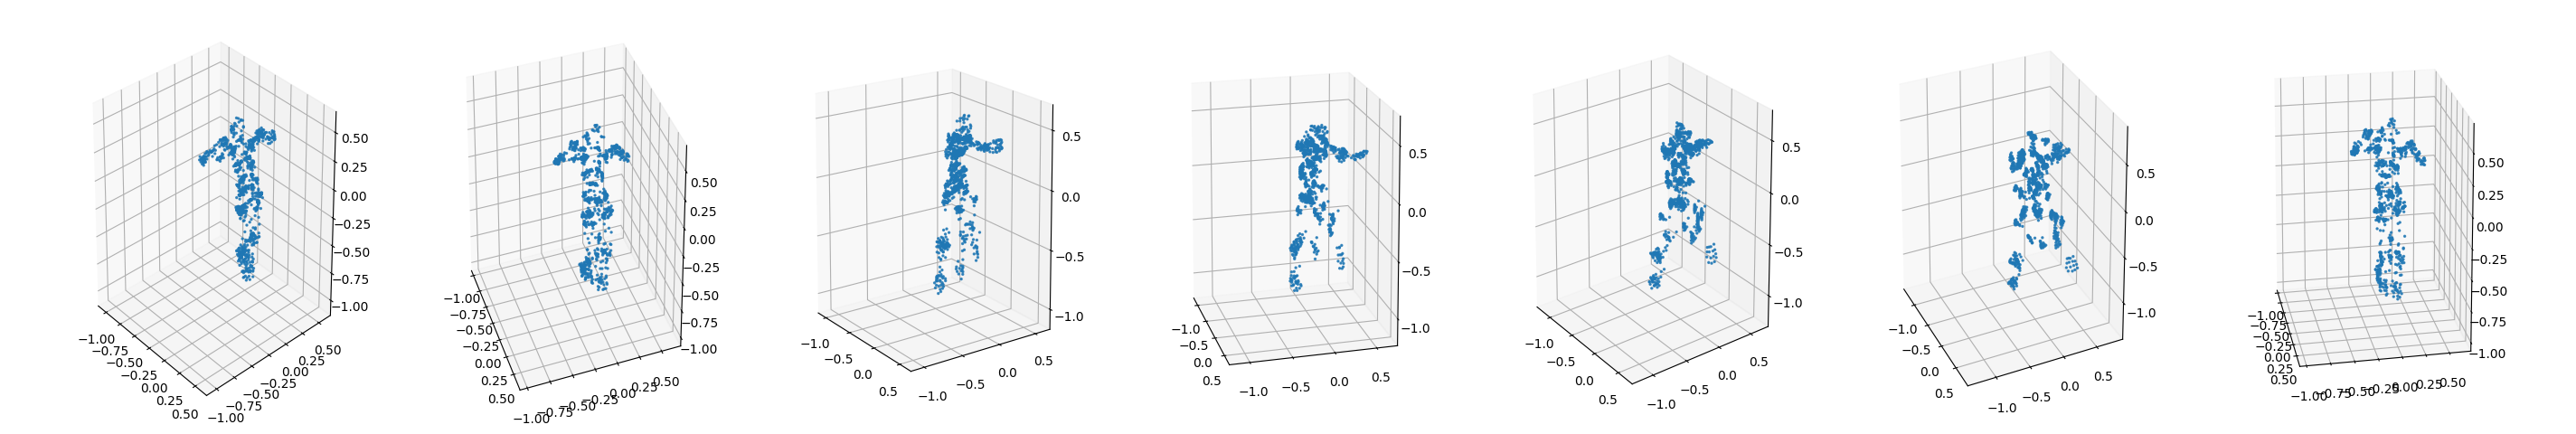

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = [None] *(n_interp+2)
for i in range(n_interp+2):
    ax[i] = fig.add_subplot(1, n_interp+2, i+1, projection='3d')
    #ax[i].axis('off')
    sampled_pc_plot = samples_interp[i]
    utils.plot_3d_point_cloud(sampled_pc_plot[0, :], sampled_pc_plot[1, :], sampled_pc_plot[2, :], show_axis=True, axis=ax[i])

In [1]:
import pcvae_nonpcn
import utils

import numpy as np


In [2]:

dataset_train = pcvae_nonpcn.PointCloudDataSet('../data/Humanoid-v3-locomotions_static_reduced.npz')
dataset_test = pcvae_nonpcn.PointCloudDataSet('../data/Humanoid-v3-locomotions_static_reduced.npz', train='test')

In [3]:
model = pcvae_nonpcn.PointCloudVariationalAutoEncoder(n_points=1024, latent_size=16, use_pcn=0)

In [4]:
model.load_model('nonpcn_models/pcvae_epoch_3999.pth')

In [34]:
samples = model.sample(n_sample=9)
samples = samples.numpy()
print(samples.shape)

(9, 3, 1024)


<IPython.core.display.Javascript object>


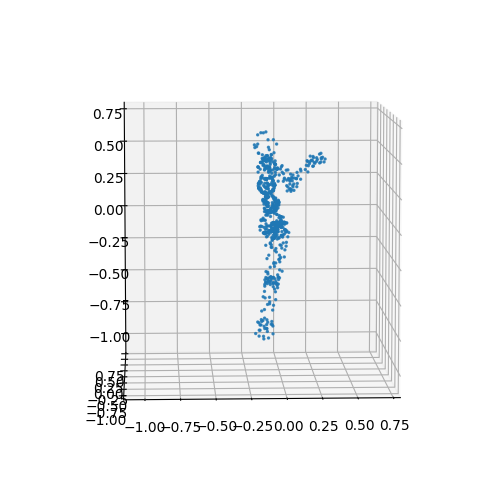

<IPython.core.display.Javascript object>


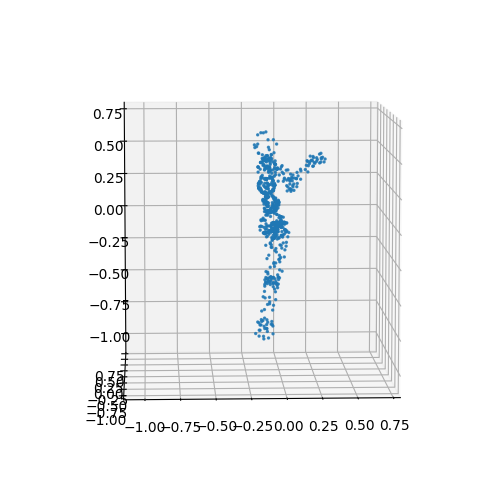

In [40]:
%matplotlib notebook

idx = 8
utils.plot_3d_point_cloud(samples[idx, 0, :], samples[idx, 1, :], samples[idx, 2, :])